In [4]:
import os

BASE_DIR = "/kaggle/input/flickr-image-dataset/flickr30k_images"
WORK_DIR = "/kaggle/working"
images_path= os.path.join(BASE_DIR, 'flickr30k_images')

os.listdir(BASE_DIR)
os.listdir("/kaggle/input")

['flickr-image-dataset']

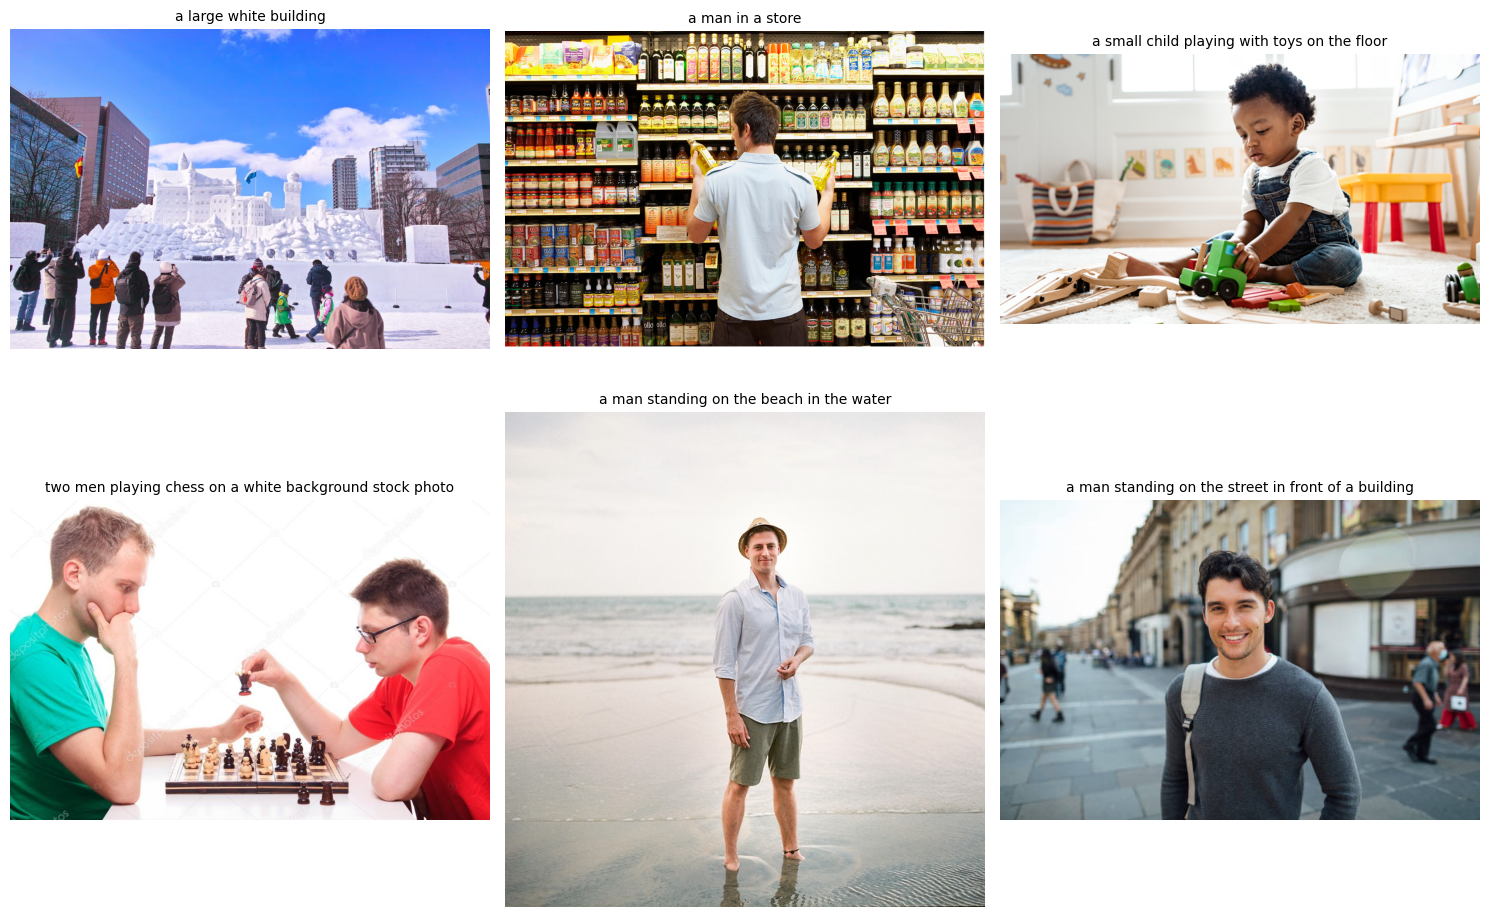

In [7]:
import os
from PIL import Image
import torch
from transformers import BlipProcessor, BlipForConditionalGeneration
import matplotlib.pyplot as plt

# === Load BLIP Model and Processor ===
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to("cuda" if torch.cuda.is_available() else "cpu")

# === Folder Containing Images ===
image_folder = "/kaggle/input/test-images/TEST_IMAGES"  # <-- Change this

# === Get All Image Files ===
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# === Generate Captions ===
captions = []
for filename in image_files:
    image_path = os.path.join(image_folder, filename)
    image = Image.open(image_path).convert("RGB")

    inputs = processor(images=image, return_tensors="pt").to(model.device)
    output = model.generate(**inputs)
    caption = processor.decode(output[0], skip_special_tokens=True)

    captions.append((filename, image, caption))

# === Display Captions Nicely ===
num_cols = 3
num_rows = (len(captions) + num_cols - 1) // num_cols
plt.figure(figsize=(15, 5 * num_rows))

for i, (filename, image, caption) in enumerate(captions):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(image)
    plt.title(caption, fontsize=10)
    plt.axis("off")

plt.tight_layout()
plt.show()
